In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/Food_Delivery_Times.csv")

In [ ]:
df.head()


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


**The Number of NULL values in the dataset**

In [ ]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


**Category wise counting in the dataset Fields**



In [ ]:
df['Traffic_Level'].value_counts()


,count
Traffic_Level,
Medium,390
Low,383
High,197


In [ ]:
df['Weather'].value_counts()


,count
Weather,
Clear,470
Rainy,204
Foggy,103
Snowy,97
Windy,96


In [ ]:
df['Time_of_Day'].value_counts()


,count
Time_of_Day,
Morning,308
Evening,293
Afternoon,284
Night,85


In [ ]:
ans = df['Courier_Experience_yrs'].mean()
ans=round(ans,0)
ans

5.0

**Dsiplaying the size of the dataset**

In [ ]:
df.shape

(1000, 9)

**Handling the missing values in the dataset**

In [ ]:
df['Weather']=df['Weather'].fillna('Clear')

In [ ]:
df['Traffic_Level']=df['Traffic_Level'].fillna('Medium')


In [ ]:
df['Time_of_Day']=df['Time_of_Day'].fillna('Morning')


In [ ]:
df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].fillna(ans)

#We have taken the mean in this column from the dataset

In [ ]:
df.drop(columns=['Order_ID'],inplace=True)


**One Hot Encoding the strings in the dataset using the sklearn.preprocessing.OneHotEncoder and sklearn.preprocessing.LabelEncoder**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# Weather	Traffic_Level	Time_of_Day	   Vehicle_Type
ohe_columns = ["Weather", "Time_of_Day", "Vehicle_Type"]
df = pd.get_dummies(df, columns=ohe_columns,drop_first=True)

In [ ]:
label_encoder = LabelEncoder()
df["Traffic_Level"] = label_encoder.fit_transform(df["Traffic_Level"])
df["Weather"] = label_encoder.fit_transform(df["Weather"])
df["Time_of_Day"] = label_encoder.fit_transform(df["Time_of_Day"])
df["Vehicle_Type"] = label_encoder.fit_transform(df["Vehicle_Type"])

In [ ]:
df.head(6)

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,4,1,0,2,12,1.0,43
1,16.42,0,2,1,0,20,2.0,84
2,9.52,1,1,3,2,28,1.0,59
3,7.44,2,2,0,2,5,1.0,37
4,19.03,0,1,2,0,16,5.0,68
5,19.40,0,1,1,2,8,9.0,57


**Visualising the model**

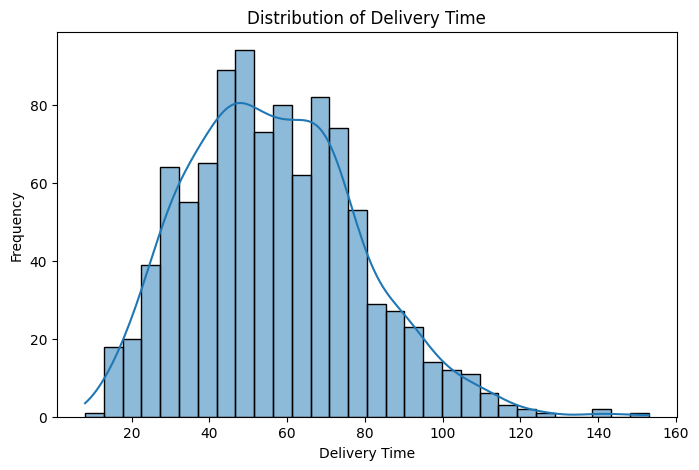

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df["Delivery_Time_min"],kde=True,bins=30)
plt.title("Distribution of Delivery Time")
plt.xlabel("Delivery Time")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
Y=df['Delivery_Time_min']
X=df.drop(columns=['Delivery_Time_min'])
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

**Printing the size of the training and the testing datasets**

In [ ]:
print("x_train.shape: ",X_train.shape)
print("y_train.shape: ",Y_train.shape)
print("x_test.shape: ",X_test.shape)
print("y_test.shape: ",Y_test.shape)

x_train.shape:  (800, 7)
y_train.shape:  (800,)
x_test.shape:  (200, 7)
y_test.shape:  (200,)


**Now taking and training the model**

In [ ]:
from sklearn.linear_model import LinearRegression
l1=LinearRegression()

In [ ]:
l1.fit(X_train,Y_train)
Y_pred= l1.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)
print("MSE",mse)
r2 = r2_score(Y_test, Y_pred)
print("R2-score",r2)

MSE 141.9090856195517
R2-score 0.7000996737666323
